<a href="https://colab.research.google.com/github/nicolasffn/nf_reqextractor/blob/main/nf_reqextractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Imports the required libraries and modules.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

# Part 2: Loads the data from a CSV file, splits it into training and testing sets, and encodes the labels as integers.

In [3]:
# Read the CSV file into a dataframe
df = pd.read_csv('./assets/csv/requirements.csv')

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2)

# Encode the labels as integers
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['label'])
test_df['label'] = label_encoder.transform(test_df['label'])

# Part 3: Tokenizes the text data and pads the sequences to the same length. The labels are also converted to one-hot encoded arrays.

In [4]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad the sequences to the same length
max_length = max([len(s) for s in train_sequences + test_sequences])
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

# Convert the labels to one-hot encoded arrays
train_labels = to_categorical(train_df['label'], num_classes=len(label_encoder.classes_))
test_labels = to_categorical(test_df['label'], num_classes=len(label_encoder.classes_))

# Part 4: Defines the architecture of the neural network and trains it on the training data.



In [5]:
model = Sequential()
model.add(Embedding(5000, 100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=150, batch_size=600, validation_data=(test_data, test_labels))

Epoch 1/150
1/1 [==============================] - 8s 8s/step - loss: 2.4846 - binary_accuracy: 0.9167 - val_loss: 2.4685 - val_binary_accuracy: 0.9167
Epoch 2/150
1/1 [==============================] - 3s 3s/step - loss: 2.4676 - binary_accuracy: 0.9167 - val_loss: 2.4445 - val_binary_accuracy: 0.9167
Epoch 3/150
1/1 [==============================] - 5s 5s/step - loss: 2.4449 - binary_accuracy: 0.9167 - val_loss: 2.3973 - val_binary_accuracy: 0.9167
Epoch 4/150
1/1 [==============================] - 3s 3s/step - loss: 2.4004 - binary_accuracy: 0.9167 - val_loss: 2.2688 - val_binary_accuracy: 0.9167
Epoch 5/150
1/1 [==============================] - 3s 3s/step - loss: 2.2812 - binary_accuracy: 0.9167 - val_loss: 1.9455 - val_binary_accuracy: 0.9167
Epoch 6/150
1/1 [==============================] - 5s 5s/step - loss: 2.0240 - binary_accuracy: 0.9165 - val_loss: 2.2628 - val_binary_accuracy: 0.9080
Epoch 7/150
1/1 [==============================] - 3s 3s/step - loss: 2.4654 - binary_ac

# Summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 100)           500000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 79, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               365568    
                                                                 
 dense (Dense)               (None, 12)                3084      
                                                                 
Total params: 868,652
Trainable params: 868,652
Non-trainable params: 0
_________________________________________________________________


Il s'agit d'un résumé d'un modèle de réseau de neurones en séquence (Sequential) en utilisant le framework de deep learning Keras.

Le modèle comporte 4 couches :

La couche "embedding" est une couche d'incorporation, elle convertit les entrées (tokenisées par exemple) en un tenseur de forme (None, 79, 100) avec un total de 500 000 paramètres appris.
La couche "spatial_dropout1d" est une couche de régularisation qui implémente une réduction de dimension spatiale. Elle n'a pas de paramètres à entraîner.
La couche "lstm" est une couche LSTM (Long Short-Term Memory), une couche RNN (Réseau de Neurones Récurrents) utilisée pour traiter les séquences. Elle produit un tenseur de forme (None, 256) avec un total de 365 568 paramètres appris.
La couche "dense" est une couche dense pleinement connectée qui produit un tenseur de forme (None, 12) avec un total de 3 084 paramètres appris.
Le modèle totalise 868 652 paramètres, tous les paramètres sont entraînables et il n'y a pas de paramètres non-entraînables.

"Produire un tenseur de forme" signifie qu'une couche dans un réseau de neurones produit une sortie sous forme de tenseur, qui est une structure de données utilisée pour stocker les données dans le cadre du deep learning.

Un tenseur est un tableau multi-dimensionnel, où chaque dimension peut représenter différentes choses en fonction du modèle et des données d'entrée. Dans ce cas précis, la forme du tenseur est spécifiée comme (None, 79, 100), (None, 256) et (None, 12) pour les différentes couches. Le premier élément "None" signifie que le nombre d'exemples dans un lot n'est pas spécifié et peut varier. Les autres chiffres spécifient le nombre de caractéristiques ou d'états pour chaque exemple dans le lot.

# plot_model from TF

In [7]:
from tensorflow.keras.utils import plot_model

# Visualize

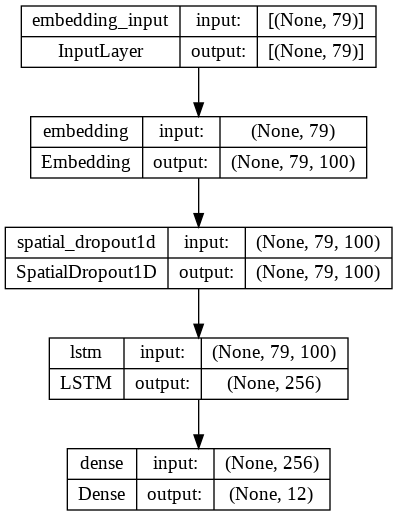

In [10]:
plot_model(model, to_file='model.png', show_shapes=True)

# Part 5: Defines a function to predict the sentiment of an input text using the trained model. The input text is tokenized and padded, then the prediction is made based on the model. The label is then decoded and the confidence of the prediction is also returned.

In [11]:
def predict_requirement(text):
    # Tokenize and pad the input text
    sequences = tokenizer.texts_to_sequences([text])
    data = pad_sequences(sequences, maxlen=max_length)
    # Predict the label
    prediction = model.predict(data)
    # Decode the label
    label_index = prediction.argmax()
    label = label_encoder.inverse_transform([label_index])
    confidence = prediction[0][label_index]
    return label[0], confidence

# Results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
phrases = ["The software must be able to calculate the sum of two numbers.",
"The website must allow users to search for products.",
"The system must be available 99.99% of the time.",
"The database must have a backup system to ensure data availability in case of failure.",
"The software must be able to recover from a crash and resume normal operations without data loss.",
"The system must detect and handle network failures without affecting the user experience.",
"The software must comply with GDPR regulations.",
"The website must include a disclaimer and privacy policy.",
"The software must have a modern and user-friendly interface.",
"The website must use consistent branding and follow a clean design.",
"The code must be well-documented to facilitate future maintenance and upgrades.",
"The system must have a monitoring system to detect potential issues before they become critical.",
"The software must be easy to install and configure.",
"The system must provide detailed logs for troubleshooting and auditing purposes.",
"The software must be able to process 1000 requests per second.",
"The website must load quickly and efficiently, even under heavy traffic.",
"The software must be compatible with Windows, macOS, and Linux operating systems.",
"The system must be able to integrate with other tools and systems through APIs.",
"The software must be able to handle an increase in users and data without significant performance degradation.",
"The system must be able to add additional resources, such as servers, as needed to maintain performance.",
"The software must use secure protocols for transmitting data.",
"The system must have strict access controls and user authentication mechanisms in place.",
"The software must have clear and intuitive navigation.",
"The website must be accessible for users with disabilities."]

for phrase in phrases:
    result = predict_requirement(phrase)
    print(f"Input: {phrase}\nPrediction: {result[0]}\nConfidence: {result[1]}")

1/1 [==============================] - 0s 486ms/step
Input: The software must be able to calculate the sum of two numbers.
Prediction: F
Confidence: 0.4291246831417084
1/1 [==============================] - 0s 55ms/step
Input: The website must allow users to search for products.
Prediction: F
Confidence: 0.7586347460746765
1/1 [==============================] - 0s 58ms/step
Input: The system must be available 99.99% of the time.
Prediction: A
Confidence: 0.938076376914978
1/1 [==============================] - 0s 64ms/step
Input: The database must have a backup system to ensure data availability in case of failure.
Prediction: L
Confidence: 0.5200797319412231
1/1 [==============================] - 0s 63ms/step
Input: The software must be able to recover from a crash and resume normal operations without data loss.
Prediction: US
Confidence: 0.45550671219825745
1/1 [==============================] - 0s 68ms/step
Input: The system must detect and handle network failures without affecting 